In [ ]:
- diff
- autocorrelation
- partial correlation
- weighted average
- exponential moving average

In [26]:
from data_loader import load 
import pandas as pd 

energy = load('energy_dataset.csv')
energy = energy.set_index('time')[['total load actual', 'total load forecast']]
dates = pd.date_range(start='2014-12-31T2300', end='2018-12-31T2200', freq='H')
energy.index = pd.DatetimeIndex(dates).tz_localize('UTC')
energy = energy.interpolate(method='linear', axis=0)
energy.isnull().sum()
energy

/var/folders/_v/zpy46p6s4g3g177nfz68d4hh0000gn/T/ipykernel_23947/2486812420.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2014-12-31T2300', end='2018-12-31T2200', freq='H')


,total load actual,total load forecast
2014-12-31 23:00:00+00:00,25385.0,26118.0
2015-01-01 00:00:00+00:00,24382.0,24934.0
2015-01-01 01:00:00+00:00,22734.0,23515.0
2015-01-01 02:00:00+00:00,21286.0,22642.0
2015-01-01 03:00:00+00:00,20264.0,21785.0
...,...,...
2018-12-31 18:00:00+00:00,30653.0,30619.0
2018-12-31 19:00:00+00:00,29735.0,29932.0
2018-12-31 20:00:00+00:00,28071.0,27903.0
2018-12-31 21:00:00+00:00,25801.0,25450.0


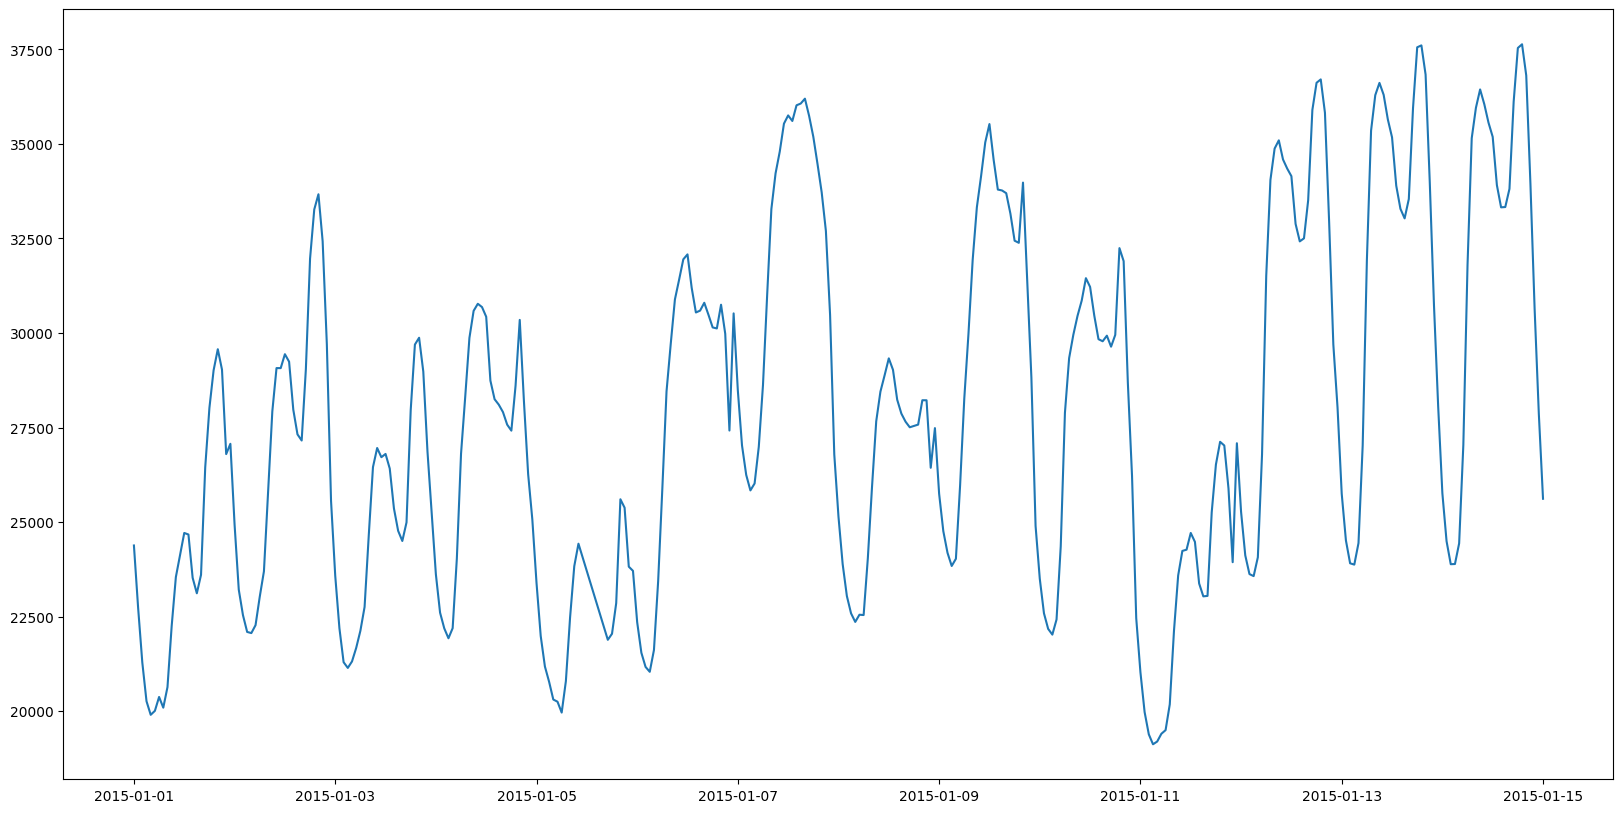

In [35]:
import matplotlib.pyplot as plt 
import datetime

energy_month = energy[
    (energy.index >= pd.Timestamp(datetime.datetime(2015,1,1)).tz_localize('UTC')) & 
    (energy.index <= pd.Timestamp(datetime.datetime(2015,1,15)).tz_localize('UTC'))
]

fig, axs = plt.subplots(1,1,figsize=(20,10))
axs.plot(energy_month.index, energy_month['total load actual'])

# Moving average

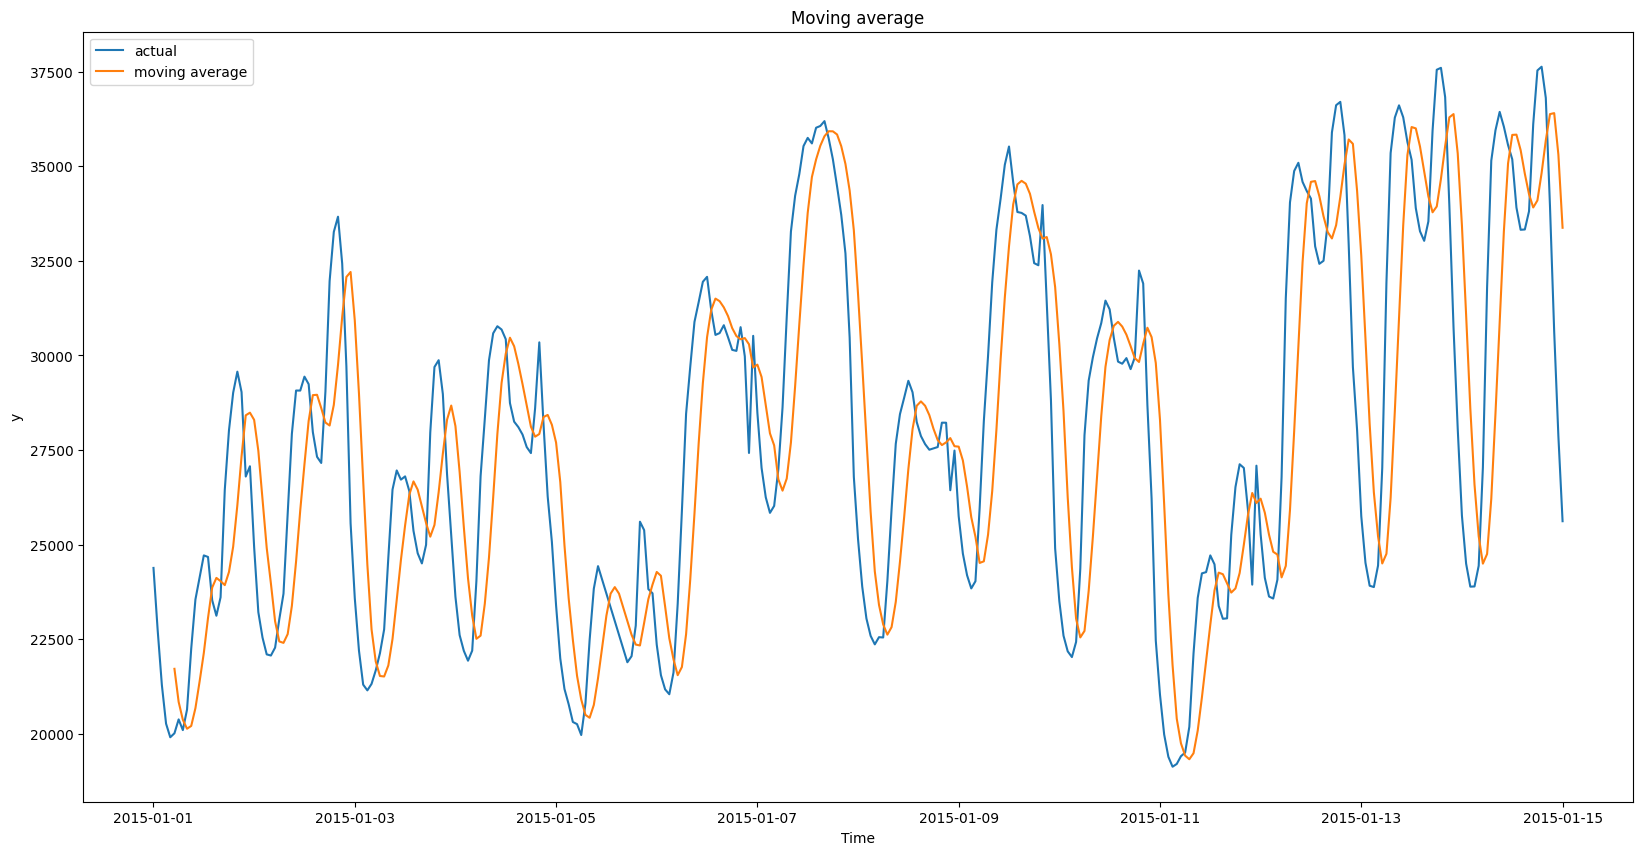

In [77]:
import numpy as np

window = 5
y = energy_month['total load actual']

moving_average = []
for i in range(len(y)):
    if i - window < 0:
        moving_average.append(None)
    else:
        moving_average.append(np.mean(y[i-window:i]))

fig, axs = plt.subplots(1,1,figsize=(20,10))
axs.plot(energy_month.index,  energy_month['total load actual'], label='actual')
axs.plot(energy_month.index, moving_average, label='moving average')
axs.set_title('Moving average')
axs.set_xlabel('Time')
axs.set_ylabel('y')
axs.legend()

# Exponential moving average

In [84]:
ema[:5]

[None, None, None, None, None]

/var/folders/_v/zpy46p6s4g3g177nfz68d4hh0000gn/T/ipykernel_23947/1424548776.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = y[i-j] * (1 - alpha)**(j-1)


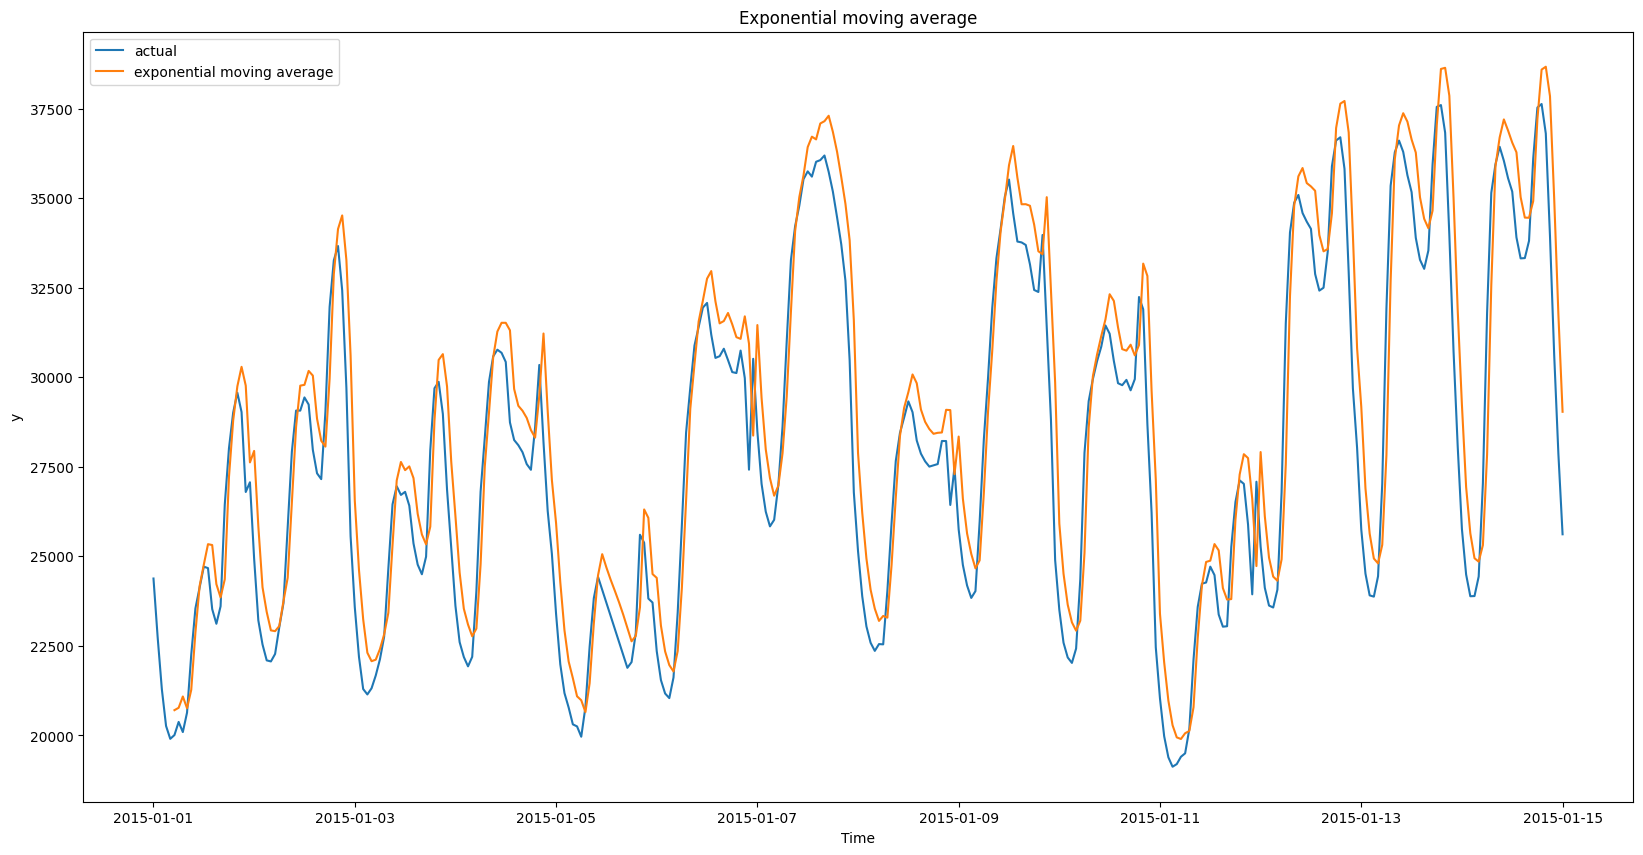

In [94]:
import numpy as np

window = 5
y = energy_month['total load actual']
alpha = 0.5

ema = []
for i in range(len(y)):
    if i - window < 0:
        ema.append(None)
    else:
        pred = 0
        for j in (1, window+1):
            p = y[i-j] * (1 - alpha)**(j-1)
            pred += p
            assert p > -10000
        assert pred > -10000
        ema.append(pred)
        #ema.append(np.mean([y[i-j] * alpha * (1 - alpha)**(j-1) for j in (1, window+1)]))

fig, axs = plt.subplots(1,1,figsize=(20,10))
axs.plot(energy_month.index,  energy_month['total load actual'], label='actual')
axs.plot(energy_month.index, ema, label='exponential moving average')
axs.set_title('Exponential moving average')
axs.set_xlabel('Time')
axs.set_ylabel('y')
axs.legend()